In [1]:
# All imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Read Data

In [2]:
# read csv as pandas dataframe
df = pd.read_csv('data.csv')

# Display column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Preprocessing

In [3]:
# check for null values
df.isnull().sum().sort_values(ascending=False)

Unnamed: 32                569
compactness_se               0
fractal_dimension_worst      0
symmetry_worst               0
concave points_worst         0
concavity_worst              0
compactness_worst            0
smoothness_worst             0
area_worst                   0
perimeter_worst              0
texture_worst                0
radius_worst                 0
fractal_dimension_se         0
symmetry_se                  0
concave points_se            0
concavity_se                 0
id                           0
diagnosis                    0
area_se                      0
perimeter_se                 0
texture_se                   0
radius_se                    0
fractal_dimension_mean       0
symmetry_mean                0
concave points_mean          0
concavity_mean               0
compactness_mean             0
smoothness_mean              0
area_mean                    0
perimeter_mean               0
texture_mean                 0
radius_mean                  0
smoothne

In [4]:
# Drop the column with all null values
df.drop(columns=['Unnamed: 32'], inplace=True)

# Drop the column with the labels (diagnosis) and id's 
y = df['diagnosis']
X = df.drop(columns=['diagnosis','id'])

# Verify the column has been dropped
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Standaring the data
X_scaled = scaler.fit_transform(X)


# Kmeans on standarized data

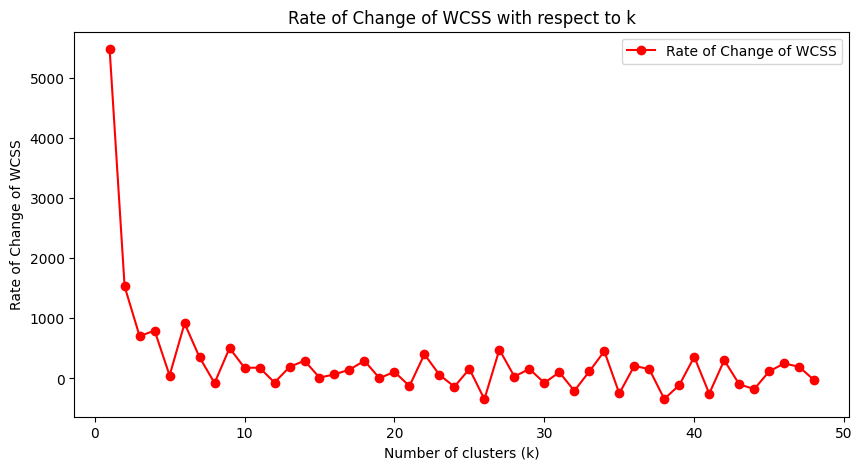

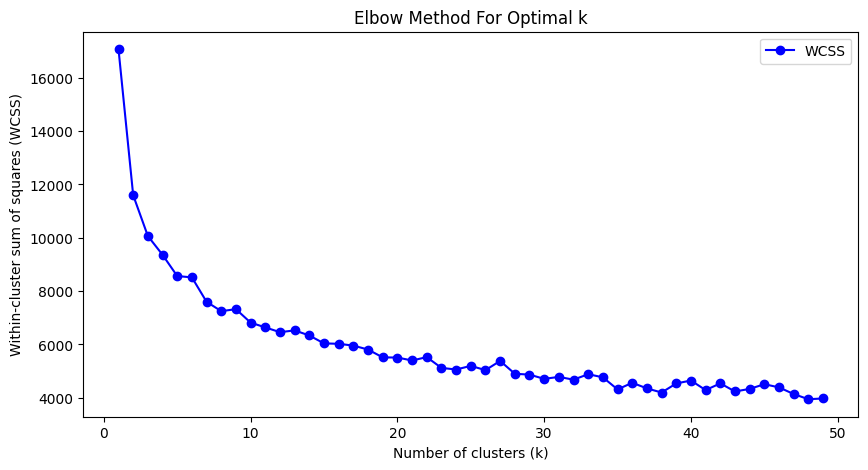

In [19]:
def initialize_centroids(X, k):
    """Randomly initialize centroids."""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Update centroids by calculating the mean of the assigned points."""
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans(X, k, max_iters=100):
    """KMeans clustering algorithm."""
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Function to calculate the within-cluster sum of squares
def calculate_wcss(X, k):
    centroids, labels = kmeans(X, k)
    wcss = sum(np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)**2)
    return wcss

# Elbow method to find the optimal k
wcss = []
K = range(1, 50)
for k in K:
    centroids, labels = kmeans(X_scaled, k)
    wcss.append(calculate_wcss(X_scaled, k))

# Calculate the rate of change of WCSS with respect to k
rate_of_change_wcss = -1*np.diff(wcss)

# Plot the rate of change of WCSS
plt.figure(figsize=(10, 5))
plt.plot(K[:-1], rate_of_change_wcss, 'ro-', label='Rate of Change of WCSS')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Rate of Change of WCSS')
plt.title('Rate of Change of WCSS with respect to k')
plt.legend()
plt.show()

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(K, wcss, 'bo-', label='WCSS')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.legend()
plt.show()

Rate of decrease of wcss is at a local minimum at value 8 for k; thus, kmeans will be done at that value!

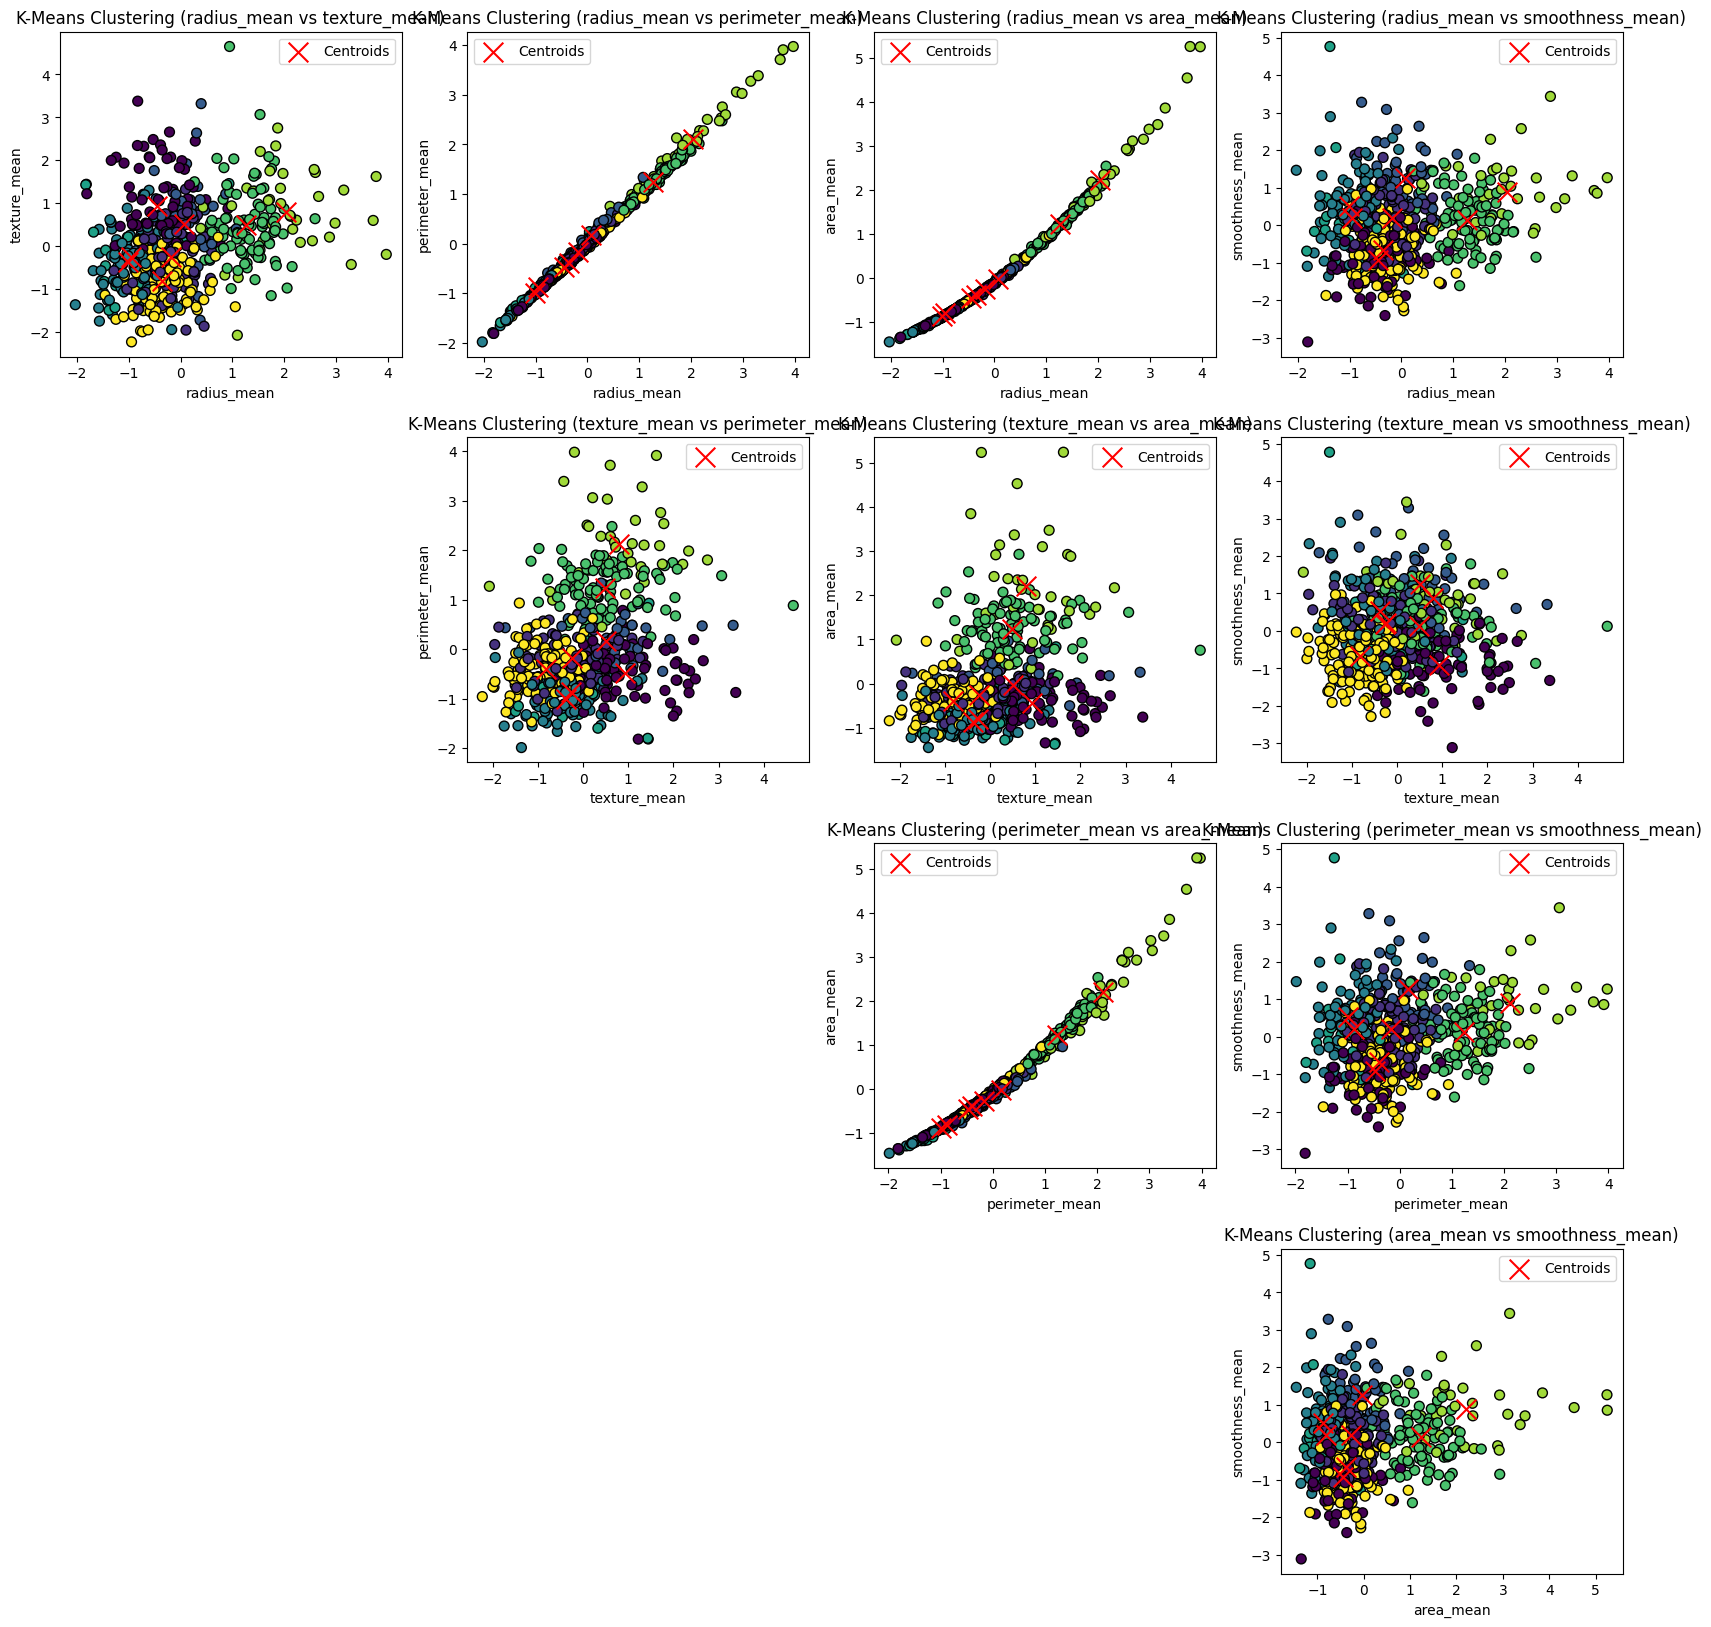

In [7]:
# Perform k-means clustering with k=8
k = 8
centroids, labels = kmeans(X_scaled, k)

# Produce multiple scatter plots with different features on x and y axes
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

plt.figure(figsize=(20, 20))
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.subplot(len(features), len(features), i * len(features) + j + 1)
        plt.scatter(X_scaled[:, i], X_scaled[:, j], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
        plt.scatter(centroids[:, i], centroids[:, j], c='red', marker='x', s=200, label='Centroids')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.title(f'K-Means Clustering ({features[i]} vs {features[j]})')
        plt.legend()

plt.tight_layout()
plt.show()

# PCA 

PCA done on standarized data to decrease its dimensions by capturing trends in the covariance between features.

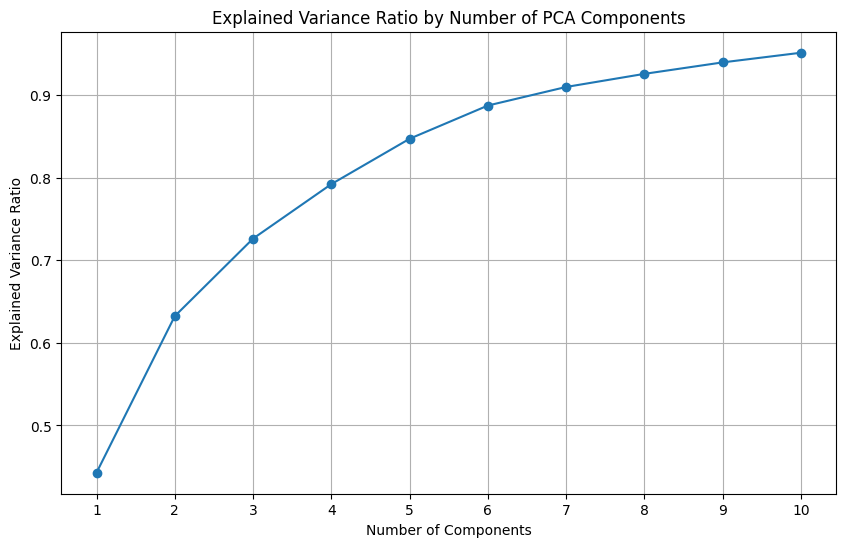

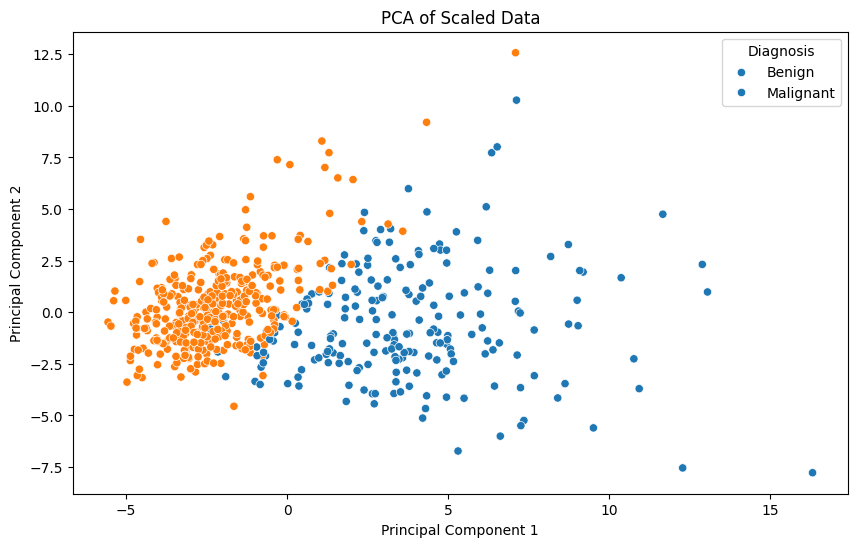

In [8]:
def pca(X, n_components):
    # Step 1: Compute the covariance matrix
    covariance_matrix = np.cov(X.T)
    
    # Step 2: Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 3: Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 4: Select the top n_components eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]
    
    # Step 5: Transform the original data to the new feature space
    X_pca = np.dot(X, selected_eigenvectors)
    
    return X_pca, sorted_eigenvalues, sorted_eigenvectors

# Loop over different numbers of components and plot the explained variance ratio
explained_variance_ratios = []
components_range = range(1, 11)

for n in components_range:
    X_pca, eigenvalues, eigenvectors = pca(X_scaled, n)
    explained_variance_ratio = np.sum(eigenvalues[:n]) / np.sum(eigenvalues)
    explained_variance_ratios.append(explained_variance_ratio)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(components_range, explained_variance_ratios, marker='o')
plt.title('Explained Variance Ratio by Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(components_range)
plt.grid(True)
plt.show()

# Create a dataframe
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_df['diagnosis'] = y

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df)
plt.title('PCA of Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])
plt.show()

Scatter plot of PCA1 and PCA2 show clustering potential. 

# Kmeans on PCA's

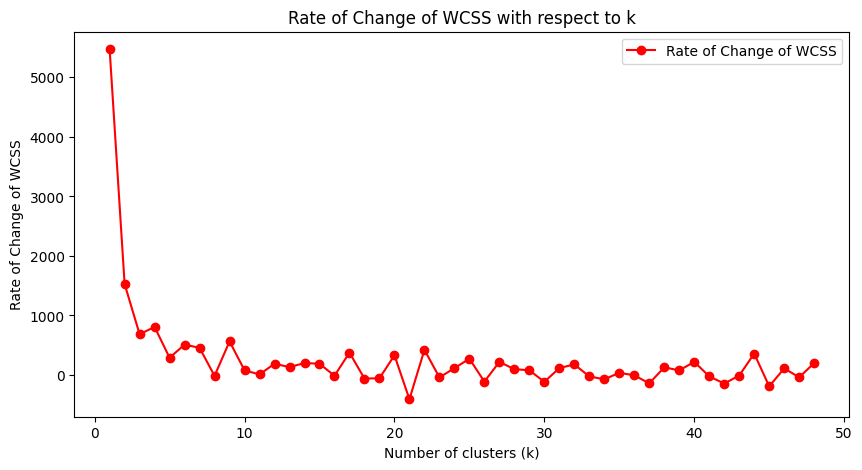

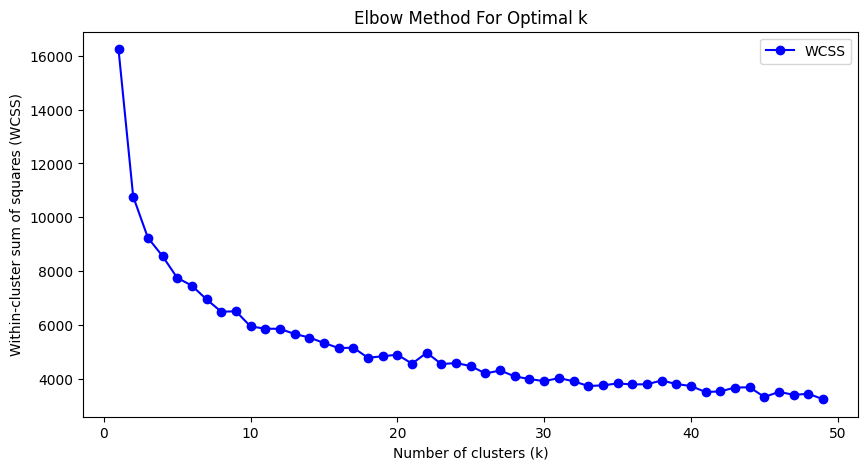

In [11]:
# Elbow method to find the optimal 
x = pca_df.drop(columns=['diagnosis'])
y = pca_df['diagnosis']
wcss = []
p = 7 # Number of principal components
K = range(1, 50)
for k in K:
    centroids, labels = kmeans(X_pca, k)
    wcss.append(calculate_wcss(X_pca, k))

# Calculate the rate of change of WCSS with respect to k
rate_of_change_wcss = -1*np.diff(wcss)

# Plot the rate of change of WCSS
plt.figure(figsize=(10, 5))
plt.plot(K[:-1], rate_of_change_wcss, 'ro-', label='Rate of Change of WCSS')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Rate of Change of WCSS')
plt.title('Rate of Change of WCSS with respect to k')
plt.legend()
plt.show()

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(K, wcss, 'bo-', label='WCSS')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.legend()
plt.show()

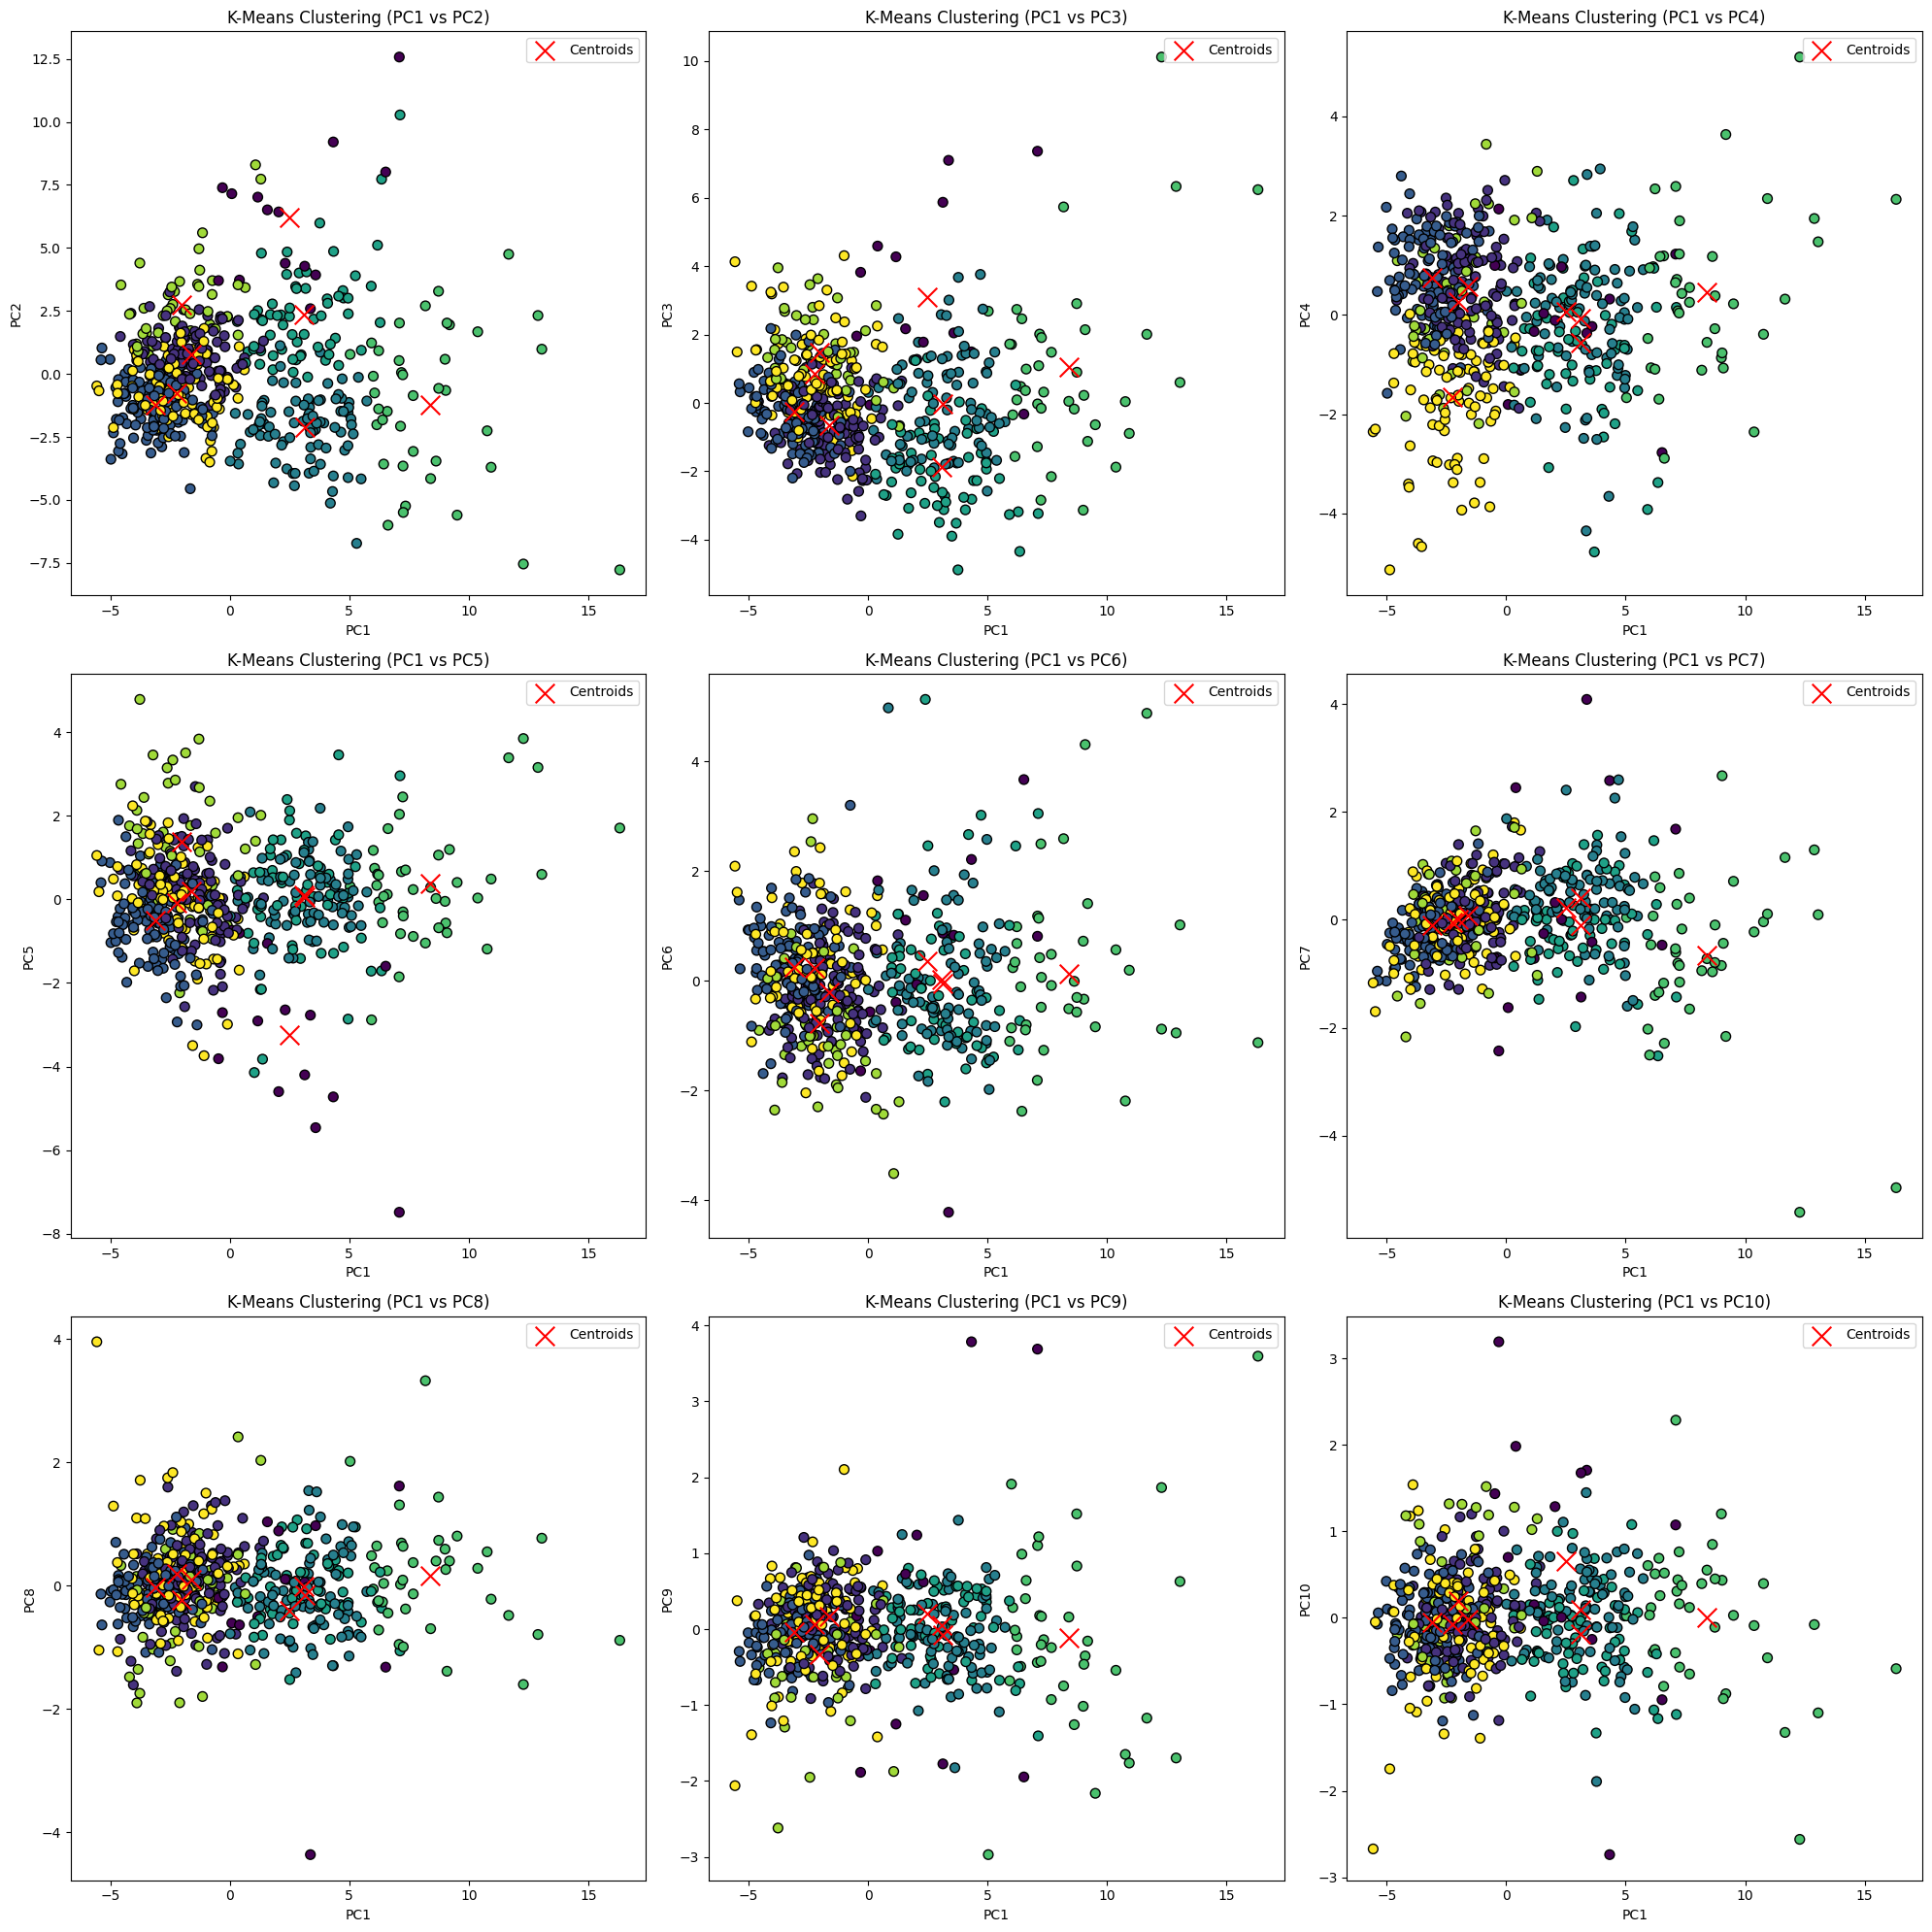

In [13]:
# Perform k-means clustering with k=8
k = 8
centroids, labels = kmeans(X_pca, k)

# Produce scatter plots with the first principal component on the x-axis and every other principal component on the y-axis
plt.figure(figsize=(20, 20))
for i in range(1, X_pca.shape[1]):
    plt.subplot(3, 3, i)
    plt.scatter(X_pca[:, 0], X_pca[:, i], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(centroids[:, 0], centroids[:, i], c='red', marker='x', s=200, label='Centroids')
    plt.xlabel('PC1')
    plt.ylabel(f'PC{i+1}')
    plt.title(f'K-Means Clustering (PC1 vs PC{i+1})')
    plt.legend()

plt.tight_layout()
plt.show()
